<a href="https://colab.research.google.com/github/qzemily/HDI-Analysis/blob/main/World_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wikepedia World Statistics 2023 Analysis

The analysis follows the six phases the data analysis process:

 **Ask**

Acording to the UN "The HDI is a summary composite measure of a country's average achievements in three basic aspects of human development:

1.   Health: A long and healthy life, as measured by life expectancy at birth
2.   Knowledge: Measured by mean years of schooling and expected years of schooling

1.   Standard of living: Measured by GNI per capita in PPP terms in US$.

The HDI sets a minimum and a maximum for each dimension, called "goalposts". This is expressed as a value between 0 and 1. The higher a country's human development, the higher its HDI value."

https://hdr.undp.org/data-center/human-development-index#/indicies/HDI

**Goal:** What correlations or insights are there between the Human Development Index(HDI) and the data provided.

 **Prepare**

Data Source: Data was found in Kaggle. https://www.kaggle.com/datasets/jiteshkumarsahoo/wikipedia-country-statistics-2023

The dataset is sourced from various Wikipedia pages using BeautifulSoup, providing a consolidated and accessible resource for individuals interested in global country statistics.

The dataset has 19 columns and 142 rows one row per Country.

Key Columns and Metrics:

Country: The name of the country.

Total in km2: Total area of the country.

Land in km2: Land area excluding water bodies.

Water in km2: Area covered by water bodies.

Water %: Percentage of the total area covered by water.

HDI: Human Development Index, a measure of a country's overall achievement in its social and economic dimensions.

%HDI Growth: Percentage growth in HDI.

IMF Forecast GDP(Nominal): International Monetary Fund's forecast for Gross Domestic Product in nominal terms.

World Bank Forecast GDP(Nominal): World Bank's forecast for Gross Domestic Product in nominal terms.

UN Forecast GDP(Nominal): United Nations' forecast for Gross Domestic Product in nominal terms.

IMF Forecast GDP(PPP): IMF's forecast for Gross Domestic Product in purchasing power parity terms.

World Bank Forecast GDP(PPP): World Bank's forecast for Gross Domestic Product in purchasing power parity terms.

CIA Forecast GDP(PPP): Central Intelligence Agency's forecast for Gross Domestic Product in purchasing power parity terms.

Internet Users: Number of internet users in the country.

UN Continental Region: Continental region classification by the United Nations.

UN Statistical Subregion: Statistical subregion classification by the United Nations.

Population 2022: Population of the country in the year 2022.

Population 2023: Population of the country in the year 2023.

Population %Change: Percentage change in population from 2022 to 2023.

Limitations: Data is missing some countries

 **Process**

Examine the data

Fix the column 'water in km2'

Add population density column

Add column calulating the diffence between the highest HDI and the Country HDI

Explore missing values and impute the mean for each missing value

 **Analyze**

Provided in the code below after the analysis tab

 **Share**

Tableau Visualization https://public.tableau.com/app/profile/emily.quiroz/viz/HumanDevelopmentIndexInteractiveDashboard/Dashboard4

 **Act**

The data analysis presented provided valuable insight to the HDI of various countries around the world that could be used by varios industries.

The most notable observation from the analysis is that there is a notable difference in HDI levels across continents, with Europe having the highest overall HDI and Africa facing significant disparities, indicating the need for targeted development strategies.

Potential Actions:

*   Develop region-specific initiatives to address disparities within Africa.
*   Focus on improving healthcare, education, and economic opportunities in lower-HDI regions.
*   Leverage high-HDI regions as models for best practices.


Continuous Monitoring:

*   Establish a monitoring system to track changes in HDI over time.
*   Regularly assess the impact of interventions on human development.

Another important finding of the analysis was the disparity between internet percentage users. Again the biggest disparity happening in regions with lower HDI some actions to combat this are the following:

Digital Inclusion Initiatives:

*   Implement targeted programs to enhance internet access in regions with lower percentages with the focus on infrastructure development and affordability measures.

Knowledge and Skills Development:

*   Provide training programs to improve digital literacy in areas with lower internet user percentages.
- Foster partnerships with educational institutions and tech organizations.
- Collaborate with private sector entities to invest in digital infrastructure.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Country_data.csv')
data.head()

,Country,Total in km2,Land in km2,Water in km2,Water %,HDI,%HDI Growth,IMF Forecast GDP(Nominal),World Bank Forecast GDP(Nominal),UN Forecast GDP(Nominal),IMF Forecast GDP(PPP),World Bank Forecast GDP(PPP),CIA Forecast GDP(PPP),Internet Users,UN Continental Region,UN Statistical Subregion,Population 2022,Population 2023,Population %Change
0,Russia,17098246.0,16378410.0,16378410.0,4.2,0.822,0.29,1862470.0,2240422.0,1778782.0,5056479.0,5326855.0,3875690.0,129800000.0,Europe,Eastern Europe,1.447133e+08,1.444444e+08,-0.19
1,Canada,9984670.0,9093507.0,9093507.0,8.9,0.936,0.25,2117805.0,2139840.0,1988336.0,2378973.0,2273489.0,1742790.0,33950632.0,Americas,Northern America,3.845433e+07,3.878129e+07,0.85
2,Brazil,8510346.0,8460415.0,8460415.0,0.6,0.754,0.38,2126809.0,1920096.0,1608981.0,4101022.0,3837261.0,2989430.0,165300000.0,Americas,South America,2.153135e+08,2.164224e+08,0.52
3,India,3287263.0,2973190.0,2973190.0,9.6,0.633,0.88,3732224.0,3385090.0,3201471.0,13119622.0,11874583.0,8443360.0,881250000.0,Asia,Southern Asia,1.417173e+09,1.428628e+09,0.81
4,Argentina,2796427.0,2736690.0,2736690.0,1.6,0.842,0.09,621833.0,632770.0,487227.0,1239515.0,1225435.0,893310.0,40024673.0,Americas,South America,4.551032e+07,4.577388e+07,0.58


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           142 non-null    object 
 1   Total in km2                      142 non-null    float64
 2   Land in km2                       142 non-null    float64
 3   Water in km2                      142 non-null    float64
 4   Water %                           142 non-null    float64
 5   HDI                               142 non-null    float64
 6   %HDI Growth                       140 non-null    float64
 7   IMF Forecast GDP(Nominal)         136 non-null    float64
 8   World Bank Forecast GDP(Nominal)  137 non-null    float64
 9   UN Forecast GDP(Nominal)          138 non-null    float64
 10  IMF Forecast GDP(PPP)             137 non-null    float64
 11  World Bank Forecast GDP(PPP)      141 non-null    float64
 12  CIA Fore

In [ ]:
data.shape

(142, 19)

In [ ]:
data.describe()

,Total in km2,Land in km2,Water in km2,Water %,HDI,%HDI Growth,IMF Forecast GDP(Nominal),World Bank Forecast GDP(Nominal),UN Forecast GDP(Nominal),IMF Forecast GDP(PPP),World Bank Forecast GDP(PPP),CIA Forecast GDP(PPP),Internet Users,Population 2022,Population 2023,Population %Change
count,1.420000e+02,1.420000e+02,1.420000e+02,142.000000,142.000000,140.000000,1.360000e+02,1.370000e+02,1.380000e+02,1.370000e+02,1.410000e+02,1.390000e+02,1.420000e+02,1.420000e+02,1.420000e+02,142.000000
mean,6.516930e+05,6.304762e+05,6.304762e+05,2.538099,0.704324,0.539571,3.268823e+05,3.055762e+05,2.945361e+05,6.627371e+05,5.994211e+05,4.629539e+05,2.245352e+07,3.650124e+07,3.689126e+07,1.166408
std,1.846820e+06,1.763518e+06,1.763518e+06,4.148328,0.152592,0.396370,7.636126e+05,7.201154e+05,7.357661e+05,1.569281e+06,1.428972e+06,1.088335e+06,8.024149e+07,1.252199e+08,1.262483e+08,1.124469
min,2.600000e+01,2.600000e+01,2.600000e+01,0.000000,0.385000,0.000000,6.300000e+01,6.000000e+01,6.000000e+01,6.300000e+01,6.100000e+01,5.000000e+01,5.520000e+03,1.131200e+04,1.139600e+04,-3.640000
25%,2.669100e+04,2.549475e+04,2.549475e+04,0.000000,0.585250,0.230000,1.145125e+04,1.049200e+04,6.367750e+03,2.835600e+04,1.935800e+04,1.830500e+04,5.799232e+05,2.096591e+06,2.101970e+06,0.522500
50%,1.257585e+05,1.221600e+05,1.221600e+05,1.050000,0.717500,0.445000,3.256650e+04,2.995700e+04,2.714700e+04,7.854700e+04,6.491000e+04,5.692000e+04,3.012851e+06,9.488042e+06,9.507554e+06,1.055000
75%,5.907288e+05,5.784400e+05,5.784400e+05,2.975000,0.815000,0.762500,3.084302e+05,2.641820e+05,2.211575e+05,5.484650e+05,5.063390e+05,3.717800e+05,1.232198e+07,3.236403e+07,3.314716e+07,1.960000
max,1.709825e+07,1.637841e+07,1.637841e+07,27.800000,0.962000,1.940000,4.429838e+06,4.231141e+06,4.940878e+06,1.311962e+07,1.187458e+07,8.443360e+06,8.812500e+08,1.417173e+09,1.428628e+09,4.980000


In [ ]:
data['Land %'] = round((data['Land in km2'] / data['Total in km2']) * 100, 1)


In [ ]:
data['Population Density'] = round(data['Population 2023'] / data['Land in km2'], 2)

In [ ]:
Highest_HDI = 0.962

data['HDI disparity']= Highest_HDI - data['HDI']

In [ ]:
data['Internet User %'] = round((data['Internet Users']/data['Population 2023'] * 100),2)

In [ ]:
data['Water in km2']= data['Total in km2']-data['Land in km2']
data

,Country,Total in km2,Land in km2,Water in km2,Water %,HDI,%HDI Growth,IMF Forecast GDP(Nominal),World Bank Forecast GDP(Nominal),UN Forecast GDP(Nominal),...,Internet Users,UN Continental Region,UN Statistical Subregion,Population 2022,Population 2023,Population %Change,Land %,Population Density,HDI disparity,Internet User %
0,Russia,17098246.0,16378410.0,719836.0,4.2,0.822,0.290000,1.862470e+06,2.240422e+06,1.778782e+06,...,129800000.0,Europe,Eastern Europe,1.447133e+08,1.444444e+08,-0.19,95.8,8.82,0.140,89.86
1,Canada,9984670.0,9093507.0,891163.0,8.9,0.936,0.250000,2.117805e+06,2.139840e+06,1.988336e+06,...,33950632.0,Americas,Northern America,3.845433e+07,3.878129e+07,0.85,91.1,4.26,0.026,87.54
2,Brazil,8510346.0,8460415.0,49931.0,0.6,0.754,0.380000,2.126809e+06,1.920096e+06,1.608981e+06,...,165300000.0,Americas,South America,2.153135e+08,2.164224e+08,0.52,99.4,25.58,0.208,76.38
3,India,3287263.0,2973190.0,314073.0,9.6,0.633,0.880000,3.732224e+06,3.385090e+06,3.201471e+06,...,881250000.0,Asia,Southern Asia,1.417173e+09,1.428628e+09,0.81,90.4,480.50,0.329,61.69
4,Argentina,2796427.0,2736690.0,59737.0,1.6,0.842,0.090000,6.218330e+05,6.327700e+05,4.872270e+05,...,40024673.0,Americas,South America,4.551032e+07,4.577388e+07,0.58,97.9,16.73,0.120,87.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Saint Kitts and Nevis,261.0,261.0,0.0,0.0,0.777,0.210000,1.069000e+03,9.620000e+02,8.610000e+02,...,44669.0,Americas,Caribbean,4.765800e+04,4.775500e+04,0.20,100.0,182.97,0.185,93.54
138,Marshall Islands,181.0,181.0,0.0,0.0,0.639,0.539571,2.770000e+02,2.800000e+02,2.570000e+02,...,20560.0,Oceania,Micronesia,4.156900e+04,4.199600e+04,1.03,100.0,232.02,0.323,48.96
139,Liechtenstein,160.0,160.0,0.0,0.0,0.935,0.220000,3.268823e+05,6.608000e+03,2.945361e+05,...,37201.0,Europe,Western Europe,3.932700e+04,3.958500e+04,0.66,100.0,247.41,0.027,93.98
140,San Marino,61.0,61.0,0.0,0.0,0.853,0.539571,1.998000e+03,3.055762e+05,2.021000e+03,...,20100.0,Europe,Southern Europe,3.366100e+04,3.364200e+04,-0.06,100.0,551.51,0.109,59.75


In [ ]:
data.isnull().sum().sort_values(ascending=False)

IMF Forecast GDP(Nominal)           6
World Bank Forecast GDP(Nominal)    5
IMF Forecast GDP(PPP)               5
UN Forecast GDP(Nominal)            4
CIA Forecast GDP(PPP)               3
%HDI Growth                         2
World Bank Forecast GDP(PPP)        1
UN Continental Region               0
Population Density                  0
Land %                              0
Population %Change                  0
Population 2023                     0
Population 2022                     0
UN Statistical Subregion            0
Country                             0
Internet Users                      0
Total in km2                        0
HDI                                 0
Water %                             0
Water in km2                        0
Land in km2                         0
HDI disparity                       0
dtype: int64

In [ ]:
data['IMF Forecast GDP(Nominal)'].fillna(data['IMF Forecast GDP(Nominal)'].mean(), inplace=True)
data['World Bank Forecast GDP(Nominal)'].fillna(data['World Bank Forecast GDP(Nominal)'].mean(), inplace=True)
data['IMF Forecast GDP(PPP)'].fillna(data['IMF Forecast GDP(PPP)'].mean(), inplace=True)
data['UN Forecast GDP(Nominal)'].fillna(data['UN Forecast GDP(Nominal)'].mean(), inplace=True)
data['CIA Forecast GDP(PPP)'].fillna(data['CIA Forecast GDP(PPP)'].mean(), inplace=True)
data['%HDI Growth'].fillna(data['%HDI Growth'].mean(), inplace=True)
data['World Bank Forecast GDP(PPP)'].fillna(data['World Bank Forecast GDP(PPP)'].mean(), inplace=True)

In [ ]:
data.isnull().sum()

Country                             0
Total in km2                        0
Land in km2                         0
Water in km2                        0
Water %                             0
HDI                                 0
%HDI Growth                         0
IMF Forecast GDP(Nominal)           0
World Bank Forecast GDP(Nominal)    0
UN Forecast GDP(Nominal)            0
IMF Forecast GDP(PPP)               0
World Bank Forecast GDP(PPP)        0
CIA Forecast GDP(PPP)               0
Internet Users                      0
UN Continental Region               0
UN Statistical Subregion            0
Population 2022                     0
Population 2023                     0
Population %Change                  0
Land %                              0
Population Density                  0
HDI disparity                       0
Internet User %                     0
dtype: int64

# **Analysis**

<ipython-input-21-0812f82c94ce>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['HDI'], color='b', bins=50, hist_kws={'alpha': 0.4});


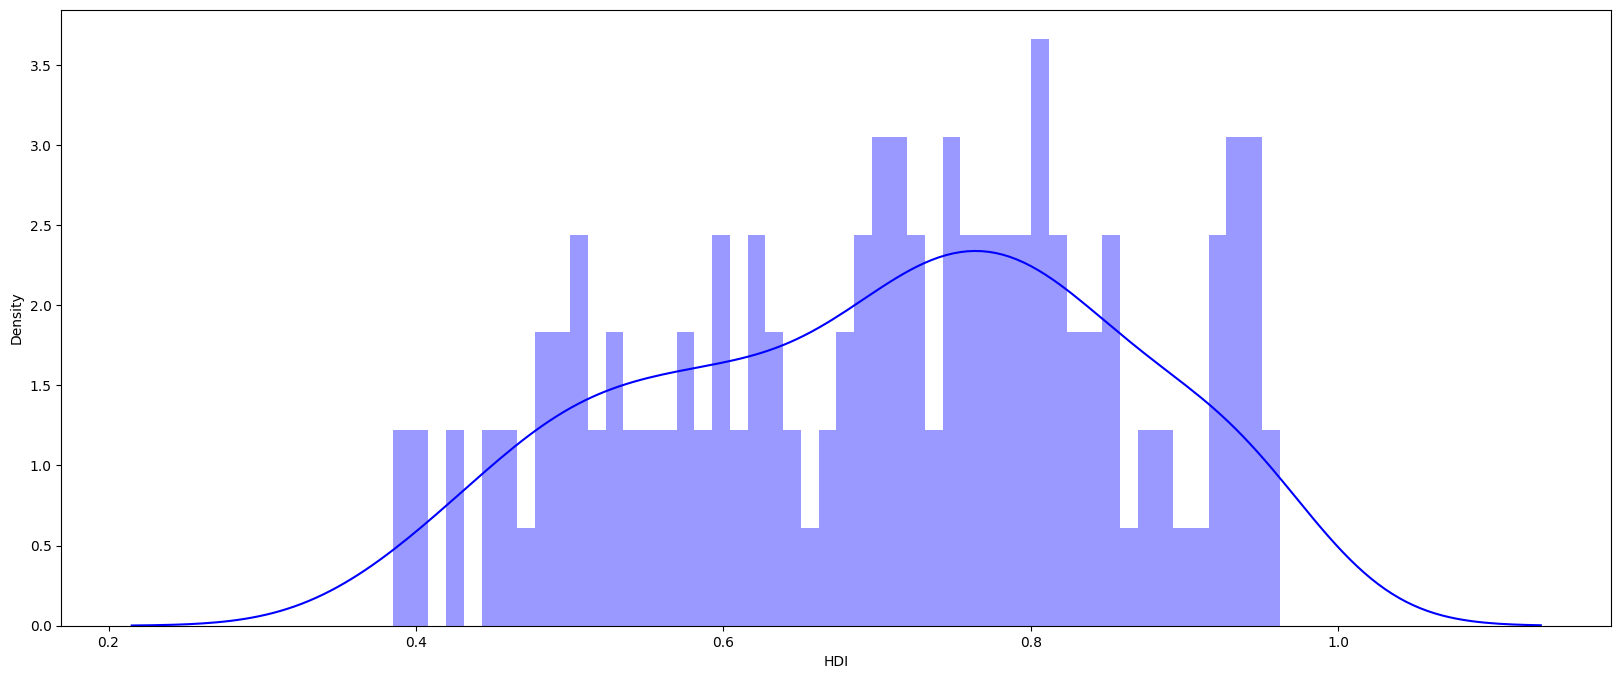

In [ ]:
# Distribution of HDI.

plt.figure(figsize=(20, 8))
sns.distplot(data['HDI'], color='b', bins=50, hist_kws={'alpha': 0.4});

**HDI Analysis:**

The lowest HDI in the data is 0.385 and the highest is 0.962.
The average HDI is of 0.704 you can see the distribution of HDI in the graph above.
Half of the countries presented in the data have an HDI of 0.7175 or lower.

In [ ]:
data['HDI'].describe()

count    142.000000
mean       0.704324
std        0.152592
min        0.385000
25%        0.585250
50%        0.717500
75%        0.815000
max        0.962000
Name: HDI, dtype: float64

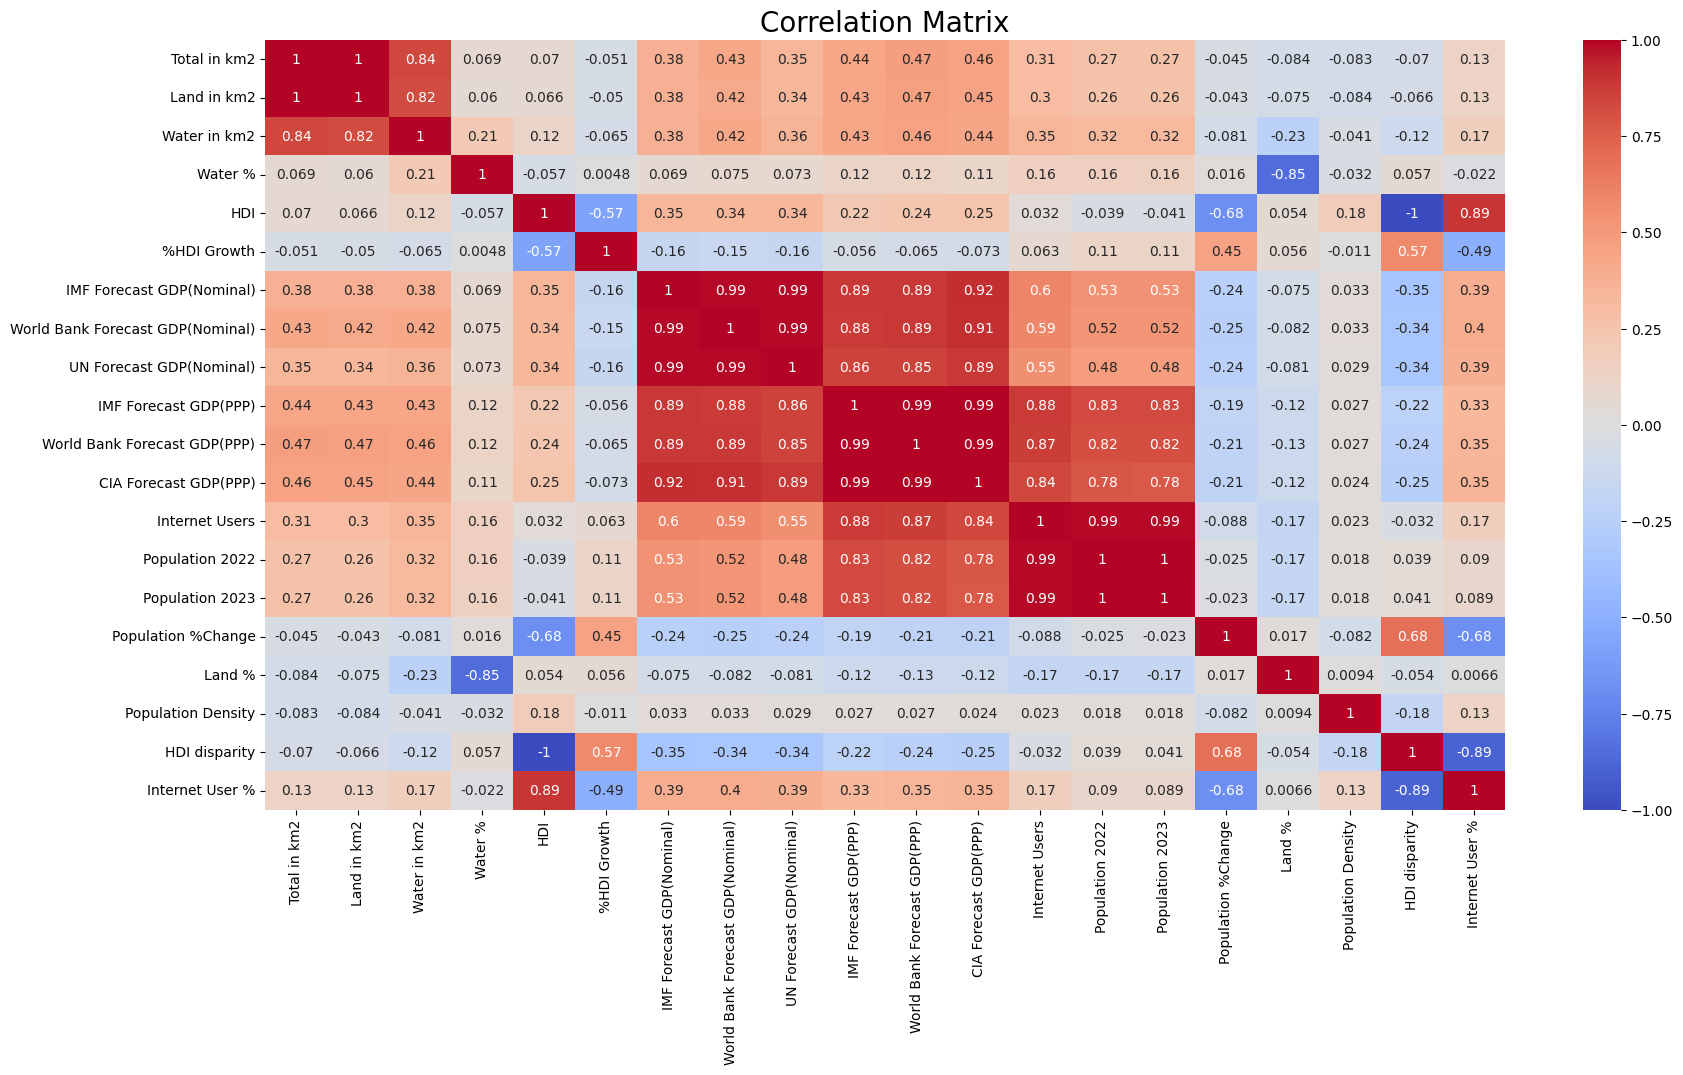

In [ ]:
# correlation matrix
num_col = data.select_dtypes(['float64'])
corr_matrix = num_col.corr()

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Matrix', fontsize=20)
plt.show()

From the HDI correlation matrix we can see that there is a strong correlation between the internet user percentage and the HDI. This lets us know that countries in which most of the population has access to the internet tend to have a better HDI.
Also there is a slight positive correlation between the Nominal GDP Forecastand HDI.
As well as a strong negative correlation between HDI and population change indicationg that as the HDI goes up the population change goes down.

<ipython-input-64-f70727480888>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-64-f70727480888>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



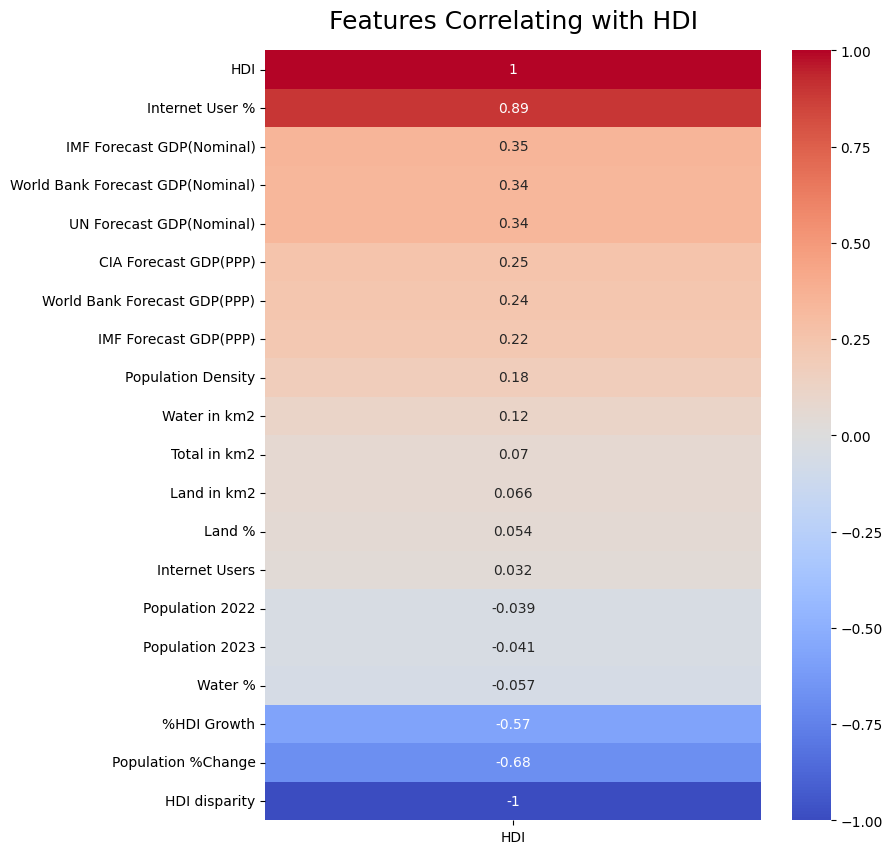

In [ ]:
#HDI correlation
data.corr()[['HDI']].sort_values(by='HDI', ascending=False)
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(data.corr()[['HDI']].sort_values(by='HDI', ascending=False), annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with HDI', fontdict={'fontsize':18}, pad=16);

**HDI by Continent**

The Continent with the highest HDI is Europe with an average HDI of 0.8795. In contrast, Africa is the lowest with an average of 0.5463.
The HDI disparity between these continen is almost of .30 indicating a better life expectancy in European countries

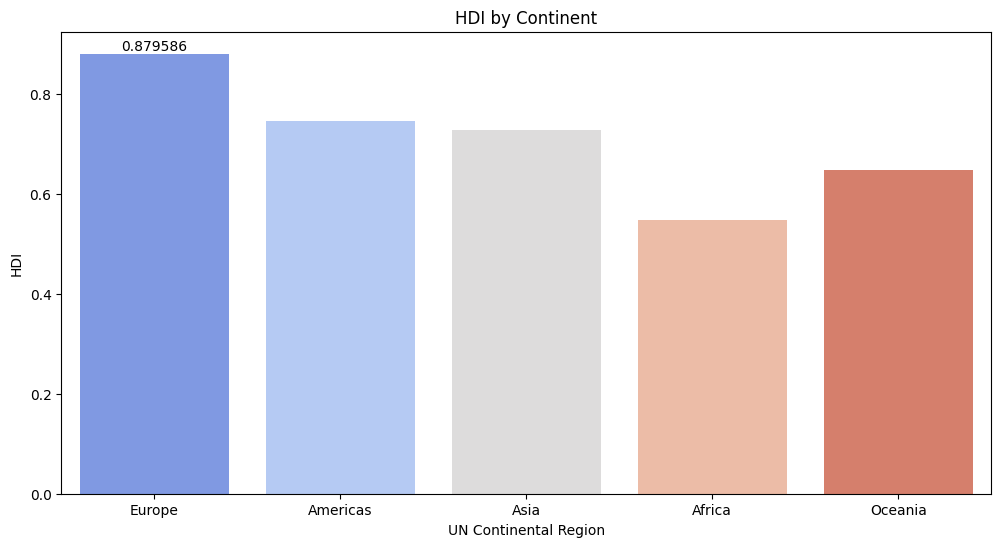

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data, x='UN Continental Region', y='HDI', hue='UN Continental Region', palette= 'coolwarm', errorbar=None, estimator= "mean", legend=False)
plt.title('HDI by Continent')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

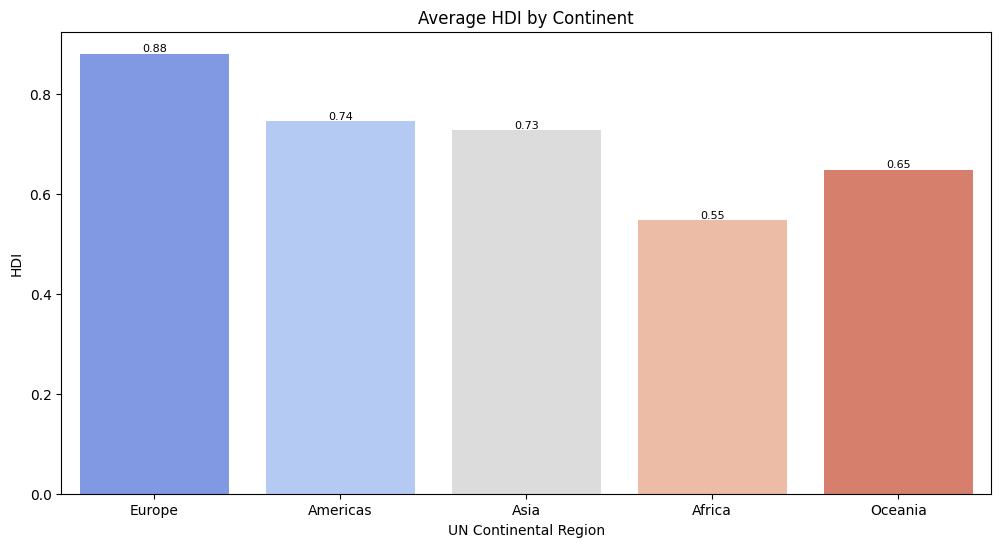

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data, x='UN Continental Region', y='HDI', hue='UN Continental Region', palette= 'coolwarm', errorbar=None, estimator= "mean")
for container in ax.containers:
    ax.bar_label(container, fontsize=8, fmt='%.2f', label_type='edge')
plt.title('Average HDI by Continent')

plt.show()

The table below shows the disparity between HDIs within a Continent. The results show that Africa, Asia and the Americas have a higher disparity than Europe and Oceania. Indicating that countries in Europe and Oceania tend to have a similiar HDI

In [ ]:
data.groupby('UN Continental Region')['HDI'].agg(highest_HDI='max',
    lowest_HDI='min',
    difference=lambda x: x.max() - x.min())

,highest_HDI,lowest_HDI,difference
UN Continental Region,,,
Africa,0.785,0.385,0.400
Americas,0.936,0.535,0.401
Asia,0.939,0.455,0.484
Europe,0.962,0.770,0.192
Oceania,0.730,0.564,0.166


In the treemap below you can see the individual contries by continent and see how the the countries HDI are distributed by continent.

In [ ]:
fig = px.treemap(data, path=[px.Constant("World HDI by Continent"), 'UN Continental Region', 'Country'], values='HDI',
                  color='HDI',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

**HDI By Subregion**

When we disect the HDI by subregion we can see the Subregions sorted by thier HDIs. Western Europe leading with an average HDI of 0.937.

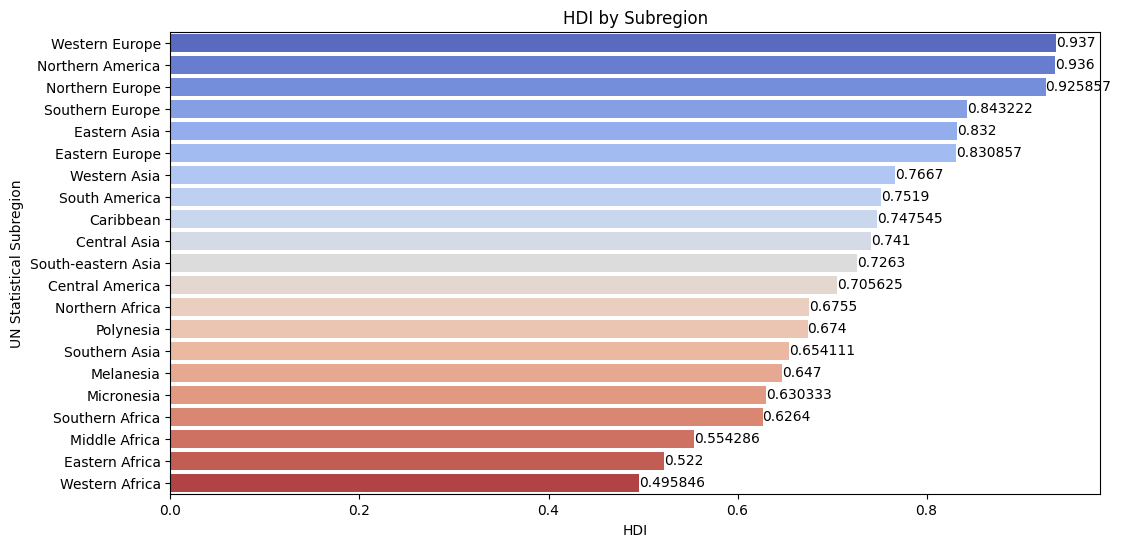

In [ ]:
grouped_data = data.groupby('UN Statistical Subregion')['HDI'].mean().reset_index()
sorted_data = grouped_data.sort_values('HDI', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(sorted_data, x='HDI', y='UN Statistical Subregion', palette='coolwarm', estimator='mean', orient='h')
plt.title('HDI by Subregion')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()


In [ ]:
africa_data = data[data['UN Continental Region'] == 'Africa']

In [ ]:
africa_data.groupby('UN Statistical Subregion')['HDI'].agg(highest_HDI='max',
    lowest_HDI='min',
    difference=lambda x: x.max() - x.min())

,highest_HDI,lowest_HDI,difference
UN Statistical Subregion,,,
Eastern Africa,0.785,0.385,0.400
Middle Africa,0.706,0.394,0.312
Northern Africa,0.745,0.508,0.237
Southern Africa,0.713,0.514,0.199
Western Africa,0.632,0.400,0.232


In [ ]:
fig = px.treemap(africa_data, path=[px.Constant("AFRICA"), 'UN Statistical Subregion', 'Country'], values='HDI',
                  color='HDI',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
europe_data = data[data['UN Continental Region'] == 'Europe']

In [ ]:
europe_data.groupby('UN Statistical Subregion')['HDI'].agg(highest_HDI='max',
    lowest_HDI='min',
    difference=lambda x: x.max() - x.min())

,highest_HDI,lowest_HDI,difference
UN Statistical Subregion,,,
Eastern Europe,0.876,0.795,0.081
Northern Europe,0.959,0.863,0.096
Southern Europe,0.918,0.770,0.148
Western Europe,0.962,0.916,0.046


In [ ]:
fig = px.treemap(europe_data, path=[px.Constant("EUROPE"), 'UN Statistical Subregion', 'Country'], values='HDI',
                  color='HDI',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
asia_data = data[data['UN Continental Region'] == 'Asia']

In [ ]:
asia_data.groupby('UN Statistical Subregion')['HDI'].agg(highest_HDI='max',
    lowest_HDI='min',
    difference=lambda x: x.max() - x.min())

,highest_HDI,lowest_HDI,difference
UN Statistical Subregion,,,
Central Asia,0.811,0.685,0.126
Eastern Asia,0.925,0.739,0.186
South-eastern Asia,0.939,0.585,0.354
Southern Asia,0.782,0.478,0.304
Western Asia,0.919,0.455,0.464


In [ ]:
fig = px.treemap(asia_data, path=[px.Constant("ASIA"), 'UN Statistical Subregion', 'Country'], values='HDI',
                  color='HDI',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
americas_data = data[data['UN Continental Region'] == 'Americas']

In [ ]:
americas_data.groupby('UN Statistical Subregion')['HDI'].agg(highest_HDI='max',
    lowest_HDI='min',
    difference=lambda x: x.max() - x.min())

,highest_HDI,lowest_HDI,difference
UN Statistical Subregion,,,
Caribbean,0.812,0.535,0.277
Central America,0.809,0.621,0.188
Northern America,0.936,0.936,0.000
South America,0.855,0.691,0.164


In [ ]:
fig = px.treemap(americas_data, path=[px.Constant("AMERICAS"), 'UN Statistical Subregion', 'Country'], values='HDI',
                  color='HDI',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
oceania_data = data[data['UN Continental Region'] == 'Oceania']

In [ ]:
oceania_data.groupby('UN Statistical Subregion')['HDI'].agg(highest_HDI='max',
    lowest_HDI='min',
    difference=lambda x: x.max() - x.min())

,highest_HDI,lowest_HDI,difference
UN Statistical Subregion,,,
Melanesia,0.730,0.564,0.166
Micronesia,0.639,0.624,0.015
Polynesia,0.707,0.641,0.066


In [ ]:
fig = px.treemap(oceania_data, path=[px.Constant("AMERICAS"), 'UN Statistical Subregion', 'Country'], values='HDI',
                  color='HDI',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

**HDI and Population**

From the graph below you can see that on average the countries with less population have a better HDI

In [ ]:
fig = px.treemap(data, path=[px.Constant("Country Population"), 'UN Continental Region', 'Country',], values='Population 2023',
                  color='HDI',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

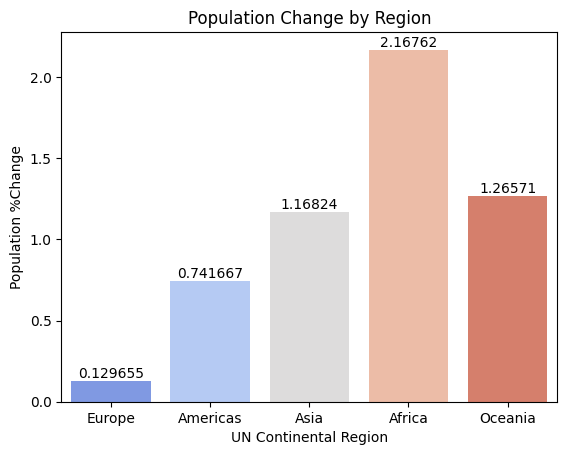

In [ ]:
ax = sns.barplot(data, x='UN Continental Region', y='Population %Change', palette='coolwarm', orient='v', errorbar=None)
plt.title('Population Change by Region')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

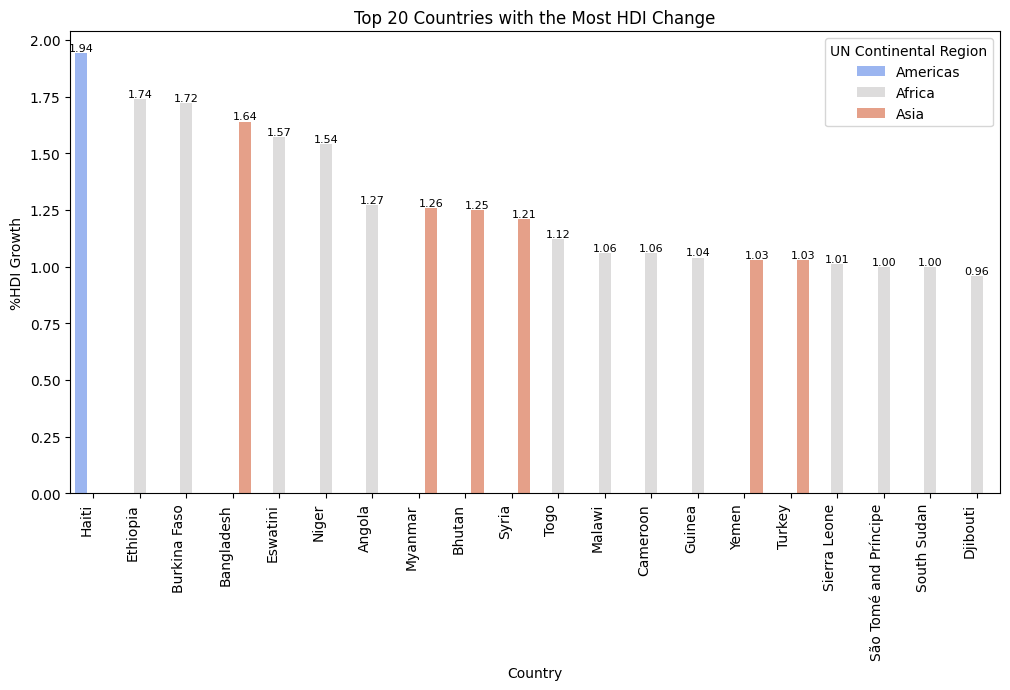

In [ ]:
sorted_data1 = data.sort_values('%HDI Growth', ascending=False)
top_20_data = sorted_data1.head(20)

plt.figure(figsize=(12, 6))
ax = sns.barplot(top_20_data, x='Country', y='%HDI Growth', errorbar=None, hue= 'UN Continental Region', palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container, fontsize=8, fmt='%.2f', label_type='edge')
plt.title('Top 20 Countries with the Most HDI Change')
plt.xticks(rotation=90, ha="right")
plt.show()


In [ ]:
data.groupby('UN Continental Region')['Internet User %'].agg(highest='max',
    lowest='min',
    difference=lambda x: x.max() - x.min())

,highest,lowest,difference
UN Continental Region,,,
Africa,71.64,1.77,69.87
Americas,93.54,11.55,81.99
Asia,96.34,9.63,86.71
Europe,98.58,59.75,38.83
Oceania,48.96,9.84,39.12


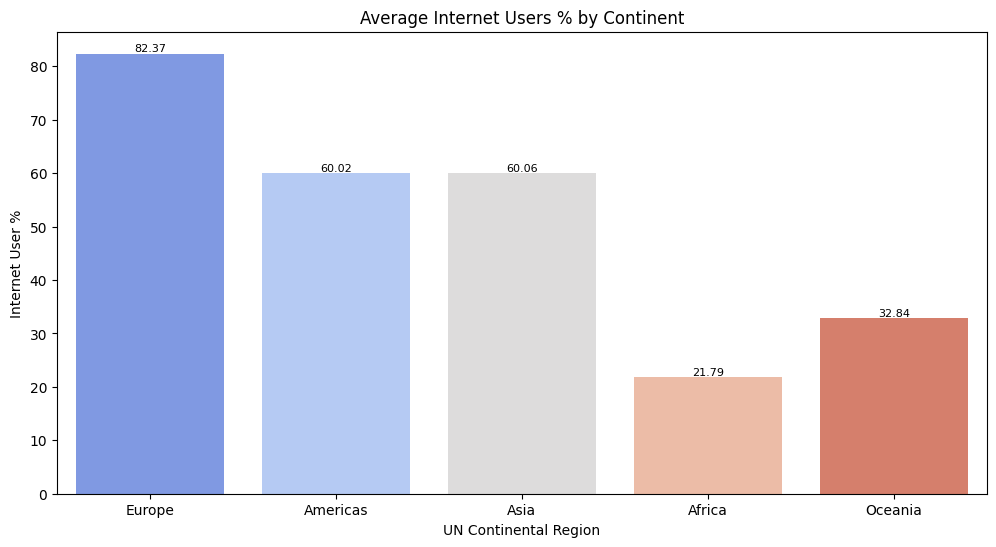

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data, x='UN Continental Region', y='Internet User %', hue='UN Continental Region', palette= 'coolwarm', errorbar=None, estimator= "mean")
for container in ax.containers:
    ax.bar_label(container, fontsize=8, fmt='%.2f', label_type='edge')
plt.title('Average Internet Users % by Continent')

plt.show()

In [ ]:
grouped_data2 = data.groupby(['Country', 'Population 2023', 'IMF Forecast GDP(PPP)', 'IMF Forecast GDP(Nominal)', 'Internet Users'])['HDI'].mean().reset_index()
sorted_data2 = grouped_data2.sort_values('HDI', ascending=False)
sorted_data2

,Country,Population 2023,IMF Forecast GDP(PPP),IMF Forecast GDP(Nominal),Internet Users,HDI
126,Switzerland,8796669.0,788335.0,905684.0,7942864.0,0.962
61,Iceland,375319.0,27078.0,30570.0,369996.0,0.959
36,Denmark,5910913.0,441754.0,420800.0,5407278.0,0.948
125,Sweden,10612086.0,715995.0,597110.0,9554907.0,0.947
66,Ireland,5056935.0,722929.0,589569.0,4024552.0,0.945
...,...,...,...,...,...,...
25,Burundi,13238559.0,11551.0,3190.0,607311.0,0.426
29,Central African Republic,5742316.0,5678.0,2760.0,202204.0,0.404
99,Niger,27202843.0,42739.0,17073.0,2194985.0,0.400
30,Chad,18278568.0,32375.0,12596.0,968500.0,0.394


In [ ]:
data.to_csv('world_stats_2023.csv', index=False)
